In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

transforms.ToTensor() - 데이터를 tensor로 바꿔준다.

transforms.Normalize(mean, std, inplace=False) - 정규화한다.

transforms.Compose - 여러 단계로 변환해야 하는 경우, Compose를 통해 여러 단계를 묶을 수 있다.

Dataset 클래스의 getitem 함수내에서 데이터를 변환하여 리턴될 때 주로 사용됩니다.

PyTorch는 torch.utils.data.DataLoader 와 torch.utils.data.Dataset 의 두 가지 데이터 기본 요소를 제공하여 미리 준비해둔(pre-loaded) 데이터셋 뿐만 아니라 가지고 있는 데이터를 사용할 수 있도록 합니다

#torchvision 을 사용하여 CIFAR10의 학습용 / 시험용 데이터셋 불러오기+ 정규화하기

In [11]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root = './data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size = batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


transet,testset은 데이터를 다운받는듯. torchvision의 데이터 셋을 사용한다. 따라서 torchvision.datasets라고 말함.

trainloader,testloader는 데이터를 불러오는데 batch_size는 말 그대로 batch_size를 말하는 것 같고, num_worker는 cpu갯수다.

#클래스 정의

In [12]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [13]:
import matplotlib.pyplot as plt
import numpy as np


#이미지 출력 함수 정의

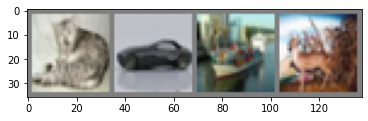

cat   car   ship  deer 


In [14]:
def imshow(img):
  img = img / 2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()
# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader) # 이렇게 정의해 두고(즉 데이터를 가져오는 방법을 정의)
images, labels = next(dataiter) # 를 실행하면 다음 batch가 나옴
# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

pytorch에서 데이터를 가져오려면 iter와 next를 써야 다음 batch로 넘어 간다.



```
torchvision.utils.make_grid
```
이미지 텐서들을 모아서 grid 형태로 만들어 주는 것. 이미지 시각화에 쓰인다.

쉽게말해 여러 이미지 텐서를 타일처럼 합쳐서 하나의 텐서로 만들어 준다.


#합성곱의 정의

Convolution 연산을 위한 레이어들은 다음과 같습니다.

Conv1d (Text-CNN에서 많이 사용)

Conv2d (이미지 분류에서 많이 사용)

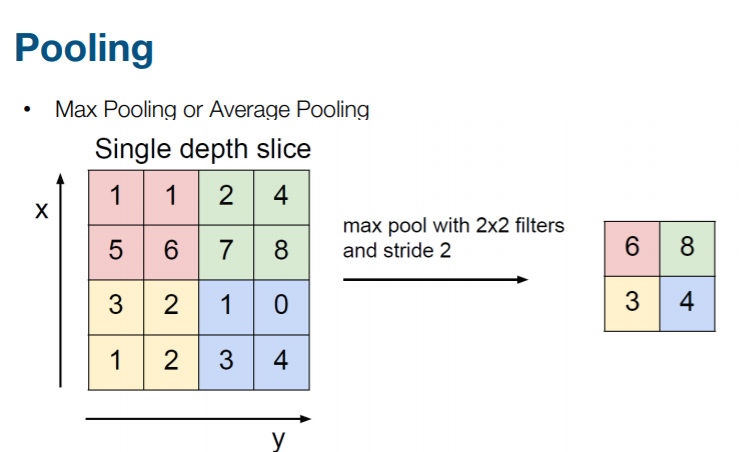

stride가 2x2라서 1,1,5,6일때, maxpooling을 쓰면 최댓값 6을 받는다.

1. Max Pooling : 정해진 크기 안에서 가장 큰 값만 뽑아낸다.
2. Average Pooling : 정해진 크기 안의 값들의 평균을 뽑아낸다.

conv2d에서 사용되는 파라미터는 위와 같습니다. 여기서 입력되어야 하는 파라미터는 in_channels, out_channels, kernel_size 입니다

In [15]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x,1) #배치를 제외한 모든 차원을 평평하게 한다.
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()


#손실함수와 옵티마이저 정의하기.

옵티마이저: 데이터와 손실함수를 바탕으로 모델의 업데이트 방법을 결정합니다.

In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

#신경망 학습하기

오차(error)를 역전파하기 위해서는 loss.backward() 만 해주면 됩니다. 

In [20]:
for epoch in range(2):

  running_loss= 0.0
  for i ,data in enumerate(trainloader,0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
       print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
       running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.086
[1,  4000] loss: 1.978
[1,  6000] loss: 1.951
[1,  8000] loss: 1.961
[1, 10000] loss: 1.921
[1, 12000] loss: 1.951
[2,  2000] loss: 1.948
[2,  4000] loss: 1.971
[2,  6000] loss: 1.963
[2,  8000] loss: 1.970
[2, 10000] loss: 1.974
[2, 12000] loss: 1.986
Finished Training


In [21]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

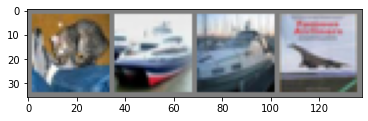

GroundTruth:  cat   ship  ship  plane


In [22]:
dataiter = iter(testloader)
images,labels = next(dataiter)

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [23]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>